# Notebook 1: Sampling & A/B Testing

## Objectives
By the end of this notebook, you will be able to:
1.  **Understand Sampling**: Why we sample and how to do it correctly.
2.  **Visualize the CLT**: See the Central Limit Theorem in action.
3.  **Perform A/B Tests**: Compare two groups using statistical methods.
4.  **Apply Best Practices**: Use `scipy.stats` for reliable testing.

## Prerequisites
-   Notebook 0 (Foundations)
-   Basic probability concepts.


## Part 1: The Power of Sampling

We rarely have access to the full **population**. Instead, we take a **sample** to make inferences.

### Law of Large Numbers
As the sample size increases, the sample mean gets closer to the population mean.

### Central Limit Theorem (CLT)
The distribution of sample means will approximate a **normal distribution**, regardless of the original data's distribution, provided the sample size is large enough.


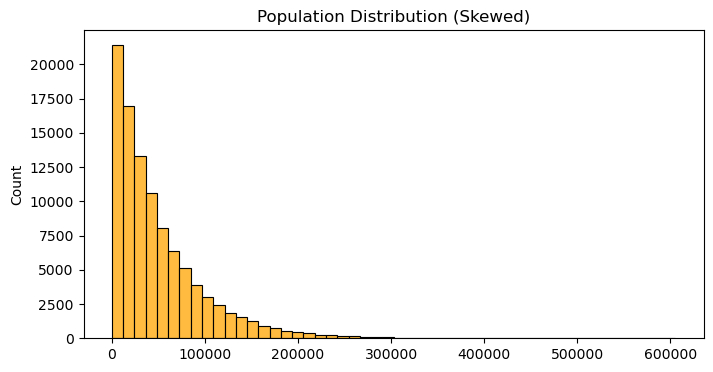

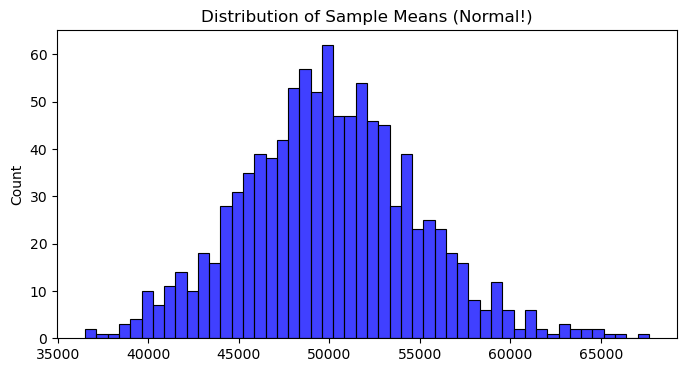

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a skewed population (e.g., salaries)
population = np.random.exponential(scale=50000, size=100000)

plt.figure(figsize=(8, 4))
sns.histplot(population, bins=50, color='orange')
plt.title("Population Distribution (Skewed)")
plt.show()

# Take samples and plot means
sample_means = []
for _ in range(1000):
    sample = np.random.choice(population, size=100) # Sample size 100
    sample_means.append(np.mean(sample))

plt.figure(figsize=(8, 4))
sns.histplot(sample_means, bins=50, color='blue')
plt.title("Distribution of Sample Means (Normal!)")
plt.show()


## Part 2: A/B Testing

A/B testing is a controlled experiment to compare two versions (A and B) to see which performs better.

### Steps
1.  **Define Metric**: What are we measuring? (e.g., Conversion Rate).
2.  **Split Traffic**: Randomly assign users to Group A or Group B.
3.  **Collect Data**: Run the experiment.
4.  **Test Hypothesis**: Is the difference statistically significant?


Observed Difference: 4.66
P-value: 0.0060


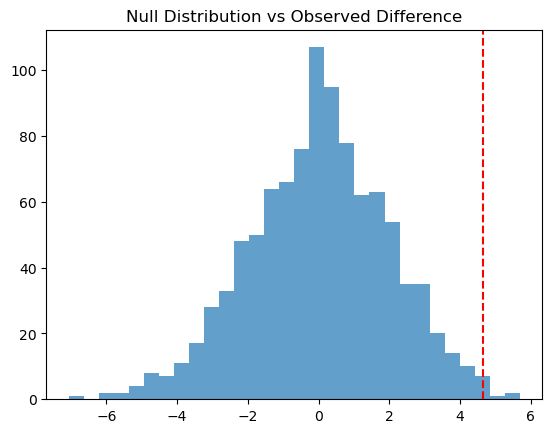

In [2]:
# Simulated Data: Group A (Control) vs Group B (Treatment)
group_a = np.random.normal(loc=100, scale=10, size=50)
group_b = np.random.normal(loc=105, scale=10, size=50)

obs_diff = np.mean(group_b) - np.mean(group_a)
print(f"Observed Difference: {obs_diff:.2f}")

# Permutation Test
combined = np.concatenate([group_a, group_b])
n_a = len(group_a)
perm_diffs = []

for _ in range(1000):
    np.random.shuffle(combined)
    new_a = combined[:n_a]
    new_b = combined[n_a:]
    perm_diffs.append(np.mean(new_b) - np.mean(new_a))

p_value = np.mean(np.array(perm_diffs) >= obs_diff)
print(f"P-value: {p_value:.4f}")

plt.hist(perm_diffs, bins=30, alpha=0.7)
plt.axvline(obs_diff, color='red', linestyle='--')
plt.title("Null Distribution vs Observed Difference")
plt.show()


## Exercises

### Task 1: CLT with Uniform Distribution
1.  Create a population of 10,000 numbers uniformly distributed between 0 and 1.
2.  Take 1,000 samples of size 50.
3.  Plot the histogram of the sample means. Does it look normal?

### Task 2: A/B Test on Conversion
Group A had 100 conversions out of 1000 visits.
Group B had 120 conversions out of 1000 visits.
1.  Create binary arrays representing these results (0 = no conversion, 1 = conversion).
2.  Run a permutation test to see if Group B is significantly better.


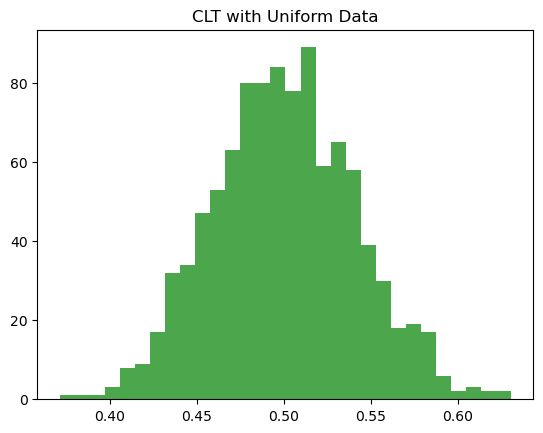

Conversion P-value: 0.0730


In [3]:
# --- SOLUTION TASK 1 ---
pop_uni = np.random.uniform(0, 1, 10000)
means_uni = [np.mean(np.random.choice(pop_uni, 50)) for _ in range(1000)]
plt.hist(means_uni, bins=30, color='green', alpha=0.7)
plt.title("CLT with Uniform Data")
plt.show()

# --- SOLUTION TASK 2 ---
conv_a = np.array([1]*100 + [0]*900)
conv_b = np.array([1]*120 + [0]*880)
obs_diff_conv = np.mean(conv_b) - np.mean(conv_a)

combined_conv = np.concatenate([conv_a, conv_b])
perm_diffs_conv = []
for _ in range(1000):
    np.random.shuffle(combined_conv)
    perm_diffs_conv.append(np.mean(combined_conv[1000:]) - np.mean(combined_conv[:1000]))

p_val_conv = np.mean(np.array(perm_diffs_conv) >= obs_diff_conv)
print(f"Conversion P-value: {p_val_conv:.4f}")


## Industry Best Practices

### Use Standard Libraries
Don't write permutation tests from scratch unless necessary. Use `scipy.stats` for standard t-tests.

```python
from scipy import stats
t_stat, p_val = stats.ttest_ind(group_a, group_b)
print(f"T-test P-value: {p_val:.4f}")
```

### Power Analysis
Before running a test, calculate the required sample size to detect a meaningful difference.
```python
from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=0.5, power=0.8, alpha=0.05)
print(f"Required Sample Size: {sample_size:.0f}")
```
